# **Are violent crime rates rising or falling in American cities?**

## **Import Libraries and Load Dataset**

In [ ]:
# import libraries
! pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load dataset
df=pd.read_csv('/content/drive/MyDrive/report.csv')
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [ ]:
# Number of records in the dataset
df.shape

(2829, 15)

In [ ]:
# Statistical Summary of the data
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [ ]:
# Data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

## **Exploratory Data Analysis**

**Crime Rate across the years from 1975 to 2015**

Text(0, 0.5, 'Number of Crimes')

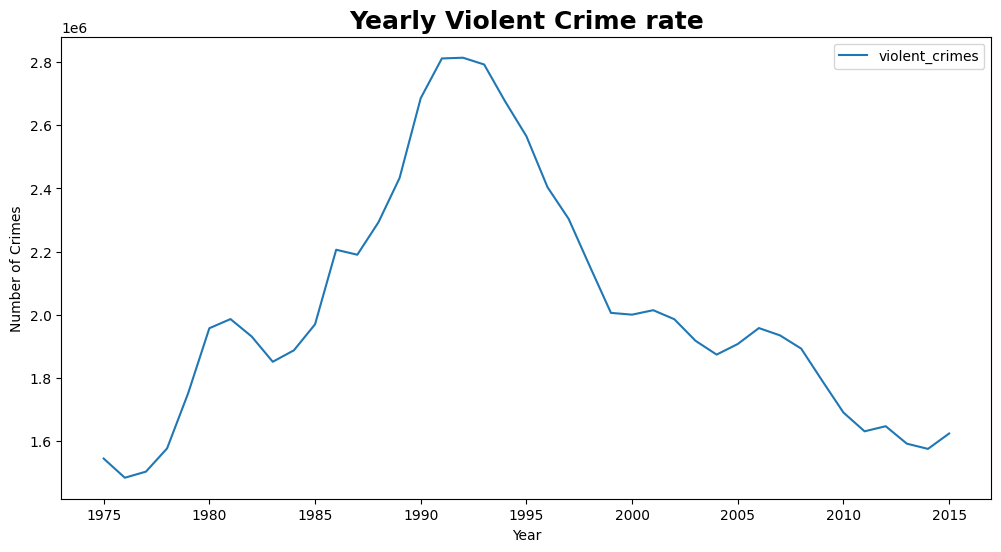

In [ ]:
yearly_violent_crimes_rate=df.groupby('report_year')['violent_crimes'].sum().to_frame()

yearly_violent_crimes_rate.plot(kind='line', figsize=(12, 6) )
plt.title('Yearly Violent Crime rate', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

**Crime rate for each four major crimes across the 1975 to 2015**

In [ ]:
yearly_rape_rate= df[['report_year', 'rapes']].groupby('report_year')['rapes'].sum().to_frame().reset_index()
yearly_homicides_rate= df[['report_year', 'homicides']].groupby('report_year')['homicides'].sum().to_frame().reset_index()
yearly_assaults_rate= df[['report_year', 'assaults']].groupby('report_year')['assaults'].sum().to_frame().reset_index()
yearly_robberies_rate= df[['report_year', 'robberies']].groupby('report_year')['robberies'].sum().to_frame().reset_index()

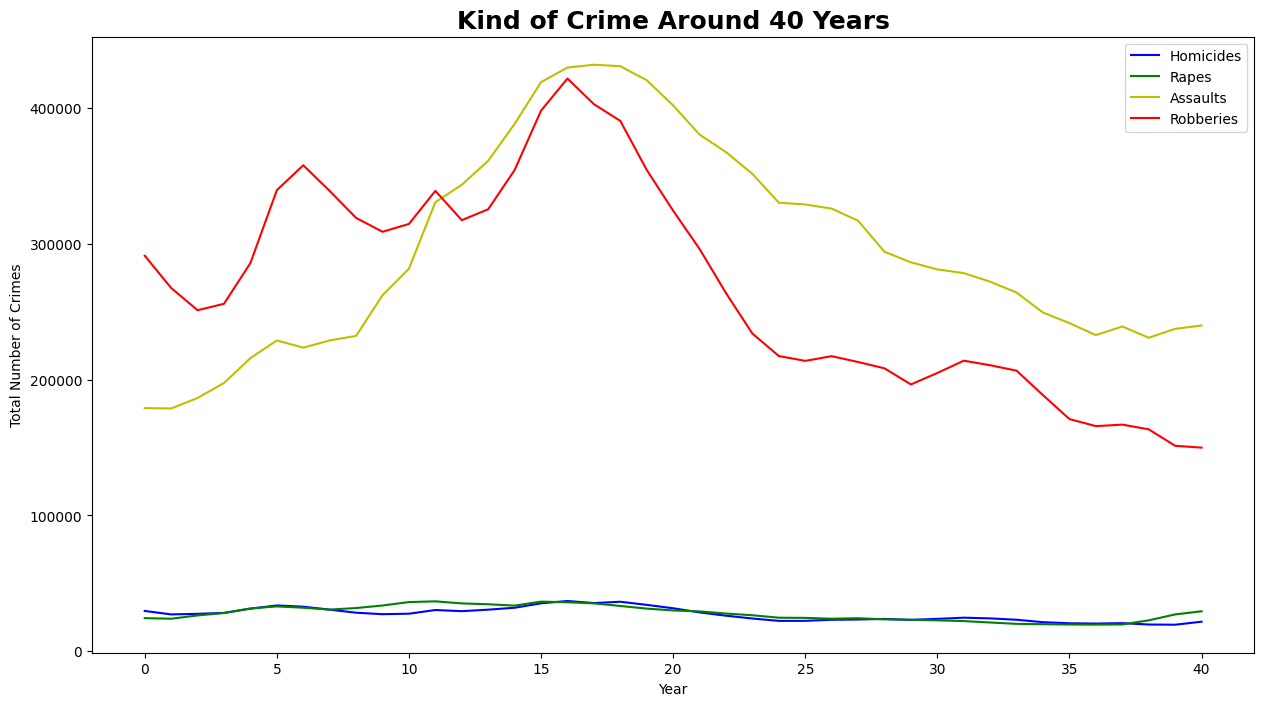

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Kind of Crime Around 40 Years', fontdict={'fontsize':18, 'fontweight':'bold'})

plt.plot(yearly_homicides_rate["homicides"],'b-', label='Homicides')
plt.plot(yearly_rape_rate['rapes'], 'g-', label='Rapes')
plt.plot(yearly_assaults_rate['assaults'], 'y-', label='Assaults')
plt.plot(yearly_robberies_rate['robberies'], 'r-', label='Robberies')




plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.legend()
plt.show()

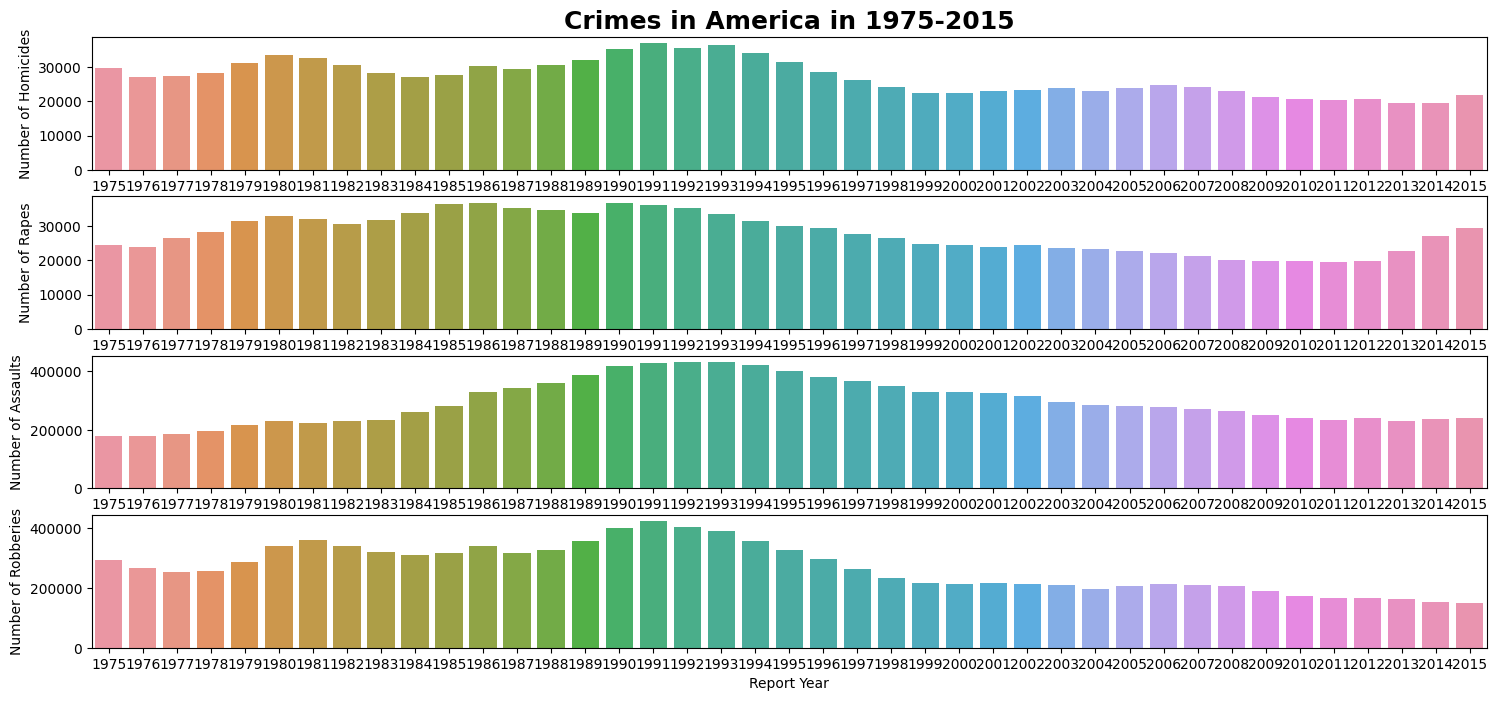

In [ ]:
plt.figure(figsize=(18,10))

ax1 = plt.subplot(511)
sns.barplot(x=yearly_homicides_rate["report_year"], y=yearly_homicides_rate["homicides"])
plt.ylabel("Number of Homicides")


ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(x=yearly_rape_rate["report_year"], y=yearly_rape_rate["rapes"])
plt.ylabel("Number of Rapes")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(x=yearly_assaults_rate["report_year"], y=yearly_assaults_rate["assaults"])
plt.ylabel("Number of Assaults")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(x=yearly_robberies_rate["report_year"], y=yearly_robberies_rate["robberies"])
plt.ylabel("Number of Robberies")

ax1.set_title('Crimes in America in 1975-2015', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xlabel("Report Year")
plt.show()

**In 40 years, what percentage of the four crime types occurred?**

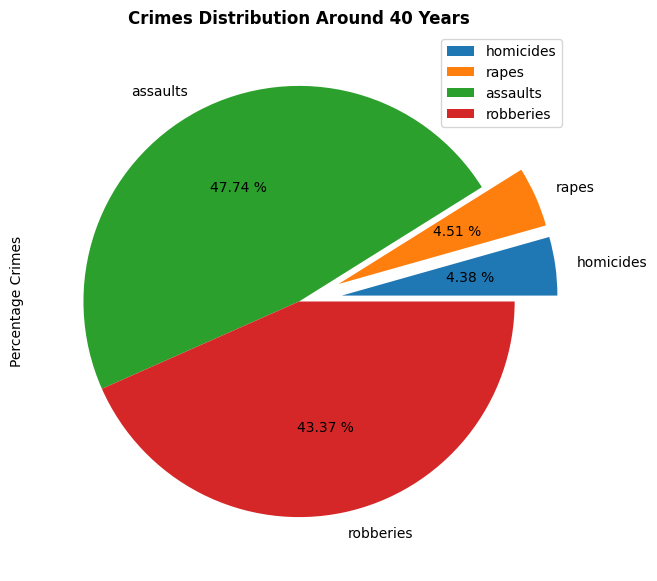

In [ ]:
df[['homicides',	'rapes', 	'assaults', 	'robberies']].sum().to_frame().plot(kind='pie', y=0, autopct='%.2f %%', explode=[0.2,0.2,0,0], figsize=(12,7)  )
plt.ylabel('Percentage Crimes')
plt.title('Crimes Distribution Around 40 Years', fontweight='bold')
plt.show()

**Crime records in each City in the United States**

In [ ]:
recorded_agency_jurisdiction_crimes=df.groupby('agency_jurisdiction')['violent_crimes'].sum().to_frame().reset_index()
recorded_agency_jurisdiction_crimes['violent_crimes']=recorded_agency_jurisdiction_crimes['violent_crimes'].astype('int64')
recorded_agency_jurisdiction_crimes=recorded_agency_jurisdiction_crimes[recorded_agency_jurisdiction_crimes['agency_jurisdiction']!='United States']

Text(0.5, 1.0, 'Crime records in each City in the United States')

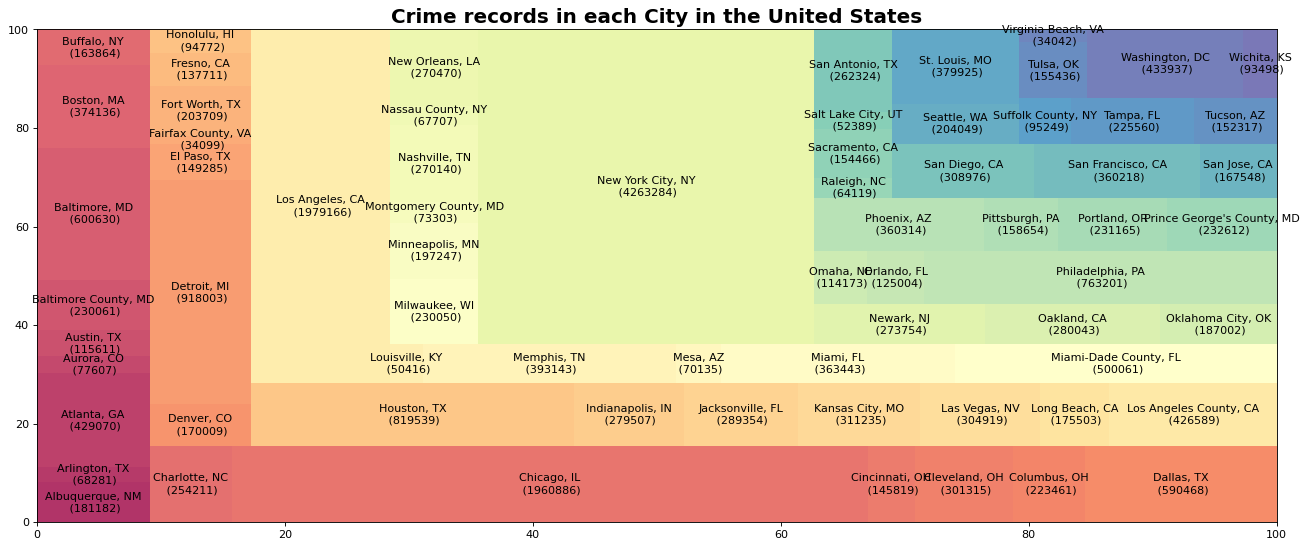

In [ ]:
labels = recorded_agency_jurisdiction_crimes.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = recorded_agency_jurisdiction_crimes['violent_crimes'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)



plt.title('Crime records in each City in the United States', fontdict={'fontsize':18, 'fontweight':'bold'})

**Crimes Distribution in 10 cities with highest crime records**

<ipython-input-114-04674620fd78>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top_crime_cities.groupby('agency_jurisdiction')['homicides',	'rapes', 	'assaults', 	'robberies'].sum().plot(kind='bar', figsize=(12,8) )


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Baltimore, MD'),
  Text(1, 0, 'Chicago, IL'),
  Text(2, 0, 'Dallas, TX'),
  Text(3, 0, 'Detroit, MI'),
  Text(4, 0, 'Houston, TX'),
  Text(5, 0, 'Los Angeles, CA'),
  Text(6, 0, 'Miami-Dade County, FL'),
  Text(7, 0, 'New York City, NY'),
  Text(8, 0, 'Philadelphia, PA'),
  Text(9, 0, 'Washington, DC')])

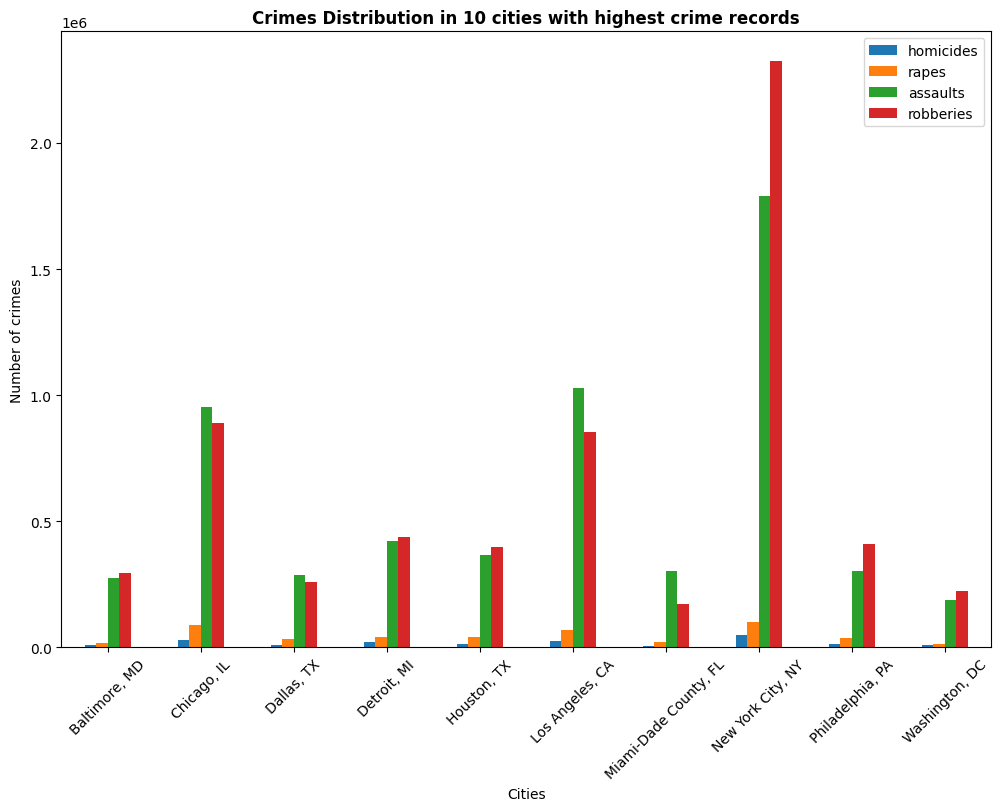

In [ ]:
Top_crime_cities=recorded_agency_jurisdiction_crimes.sort_values('violent_crimes').tail(10)['agency_jurisdiction'].to_list()
Top_crime_cities=df[df['agency_jurisdiction'].isin(Top_crime_cities)]
Top_crime_cities.groupby('agency_jurisdiction')['homicides',	'rapes', 	'assaults', 	'robberies'].sum().plot(kind='bar', figsize=(12,8) )
plt.title('Crimes Distribution in 10 cities with highest crime records', fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of crimes')
plt.xticks(rotation=45)

**Crimes Distribution in 10 cities with lowest crime records**

<ipython-input-115-742998e67f51>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  least_crime_cities.groupby('agency_jurisdiction')['homicides',	'rapes', 	'assaults', 	'robberies'].sum().plot(kind='bar', figsize=(12,8) )


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arlington, TX'),
  Text(1, 0, 'Aurora, CO'),
  Text(2, 0, 'Fairfax County, VA'),
  Text(3, 0, 'Louisville, KY'),
  Text(4, 0, 'Mesa, AZ'),
  Text(5, 0, 'Montgomery County, MD'),
  Text(6, 0, 'Nassau County, NY'),
  Text(7, 0, 'Raleigh, NC'),
  Text(8, 0, 'Salt Lake City, UT'),
  Text(9, 0, 'Virginia Beach, VA')])

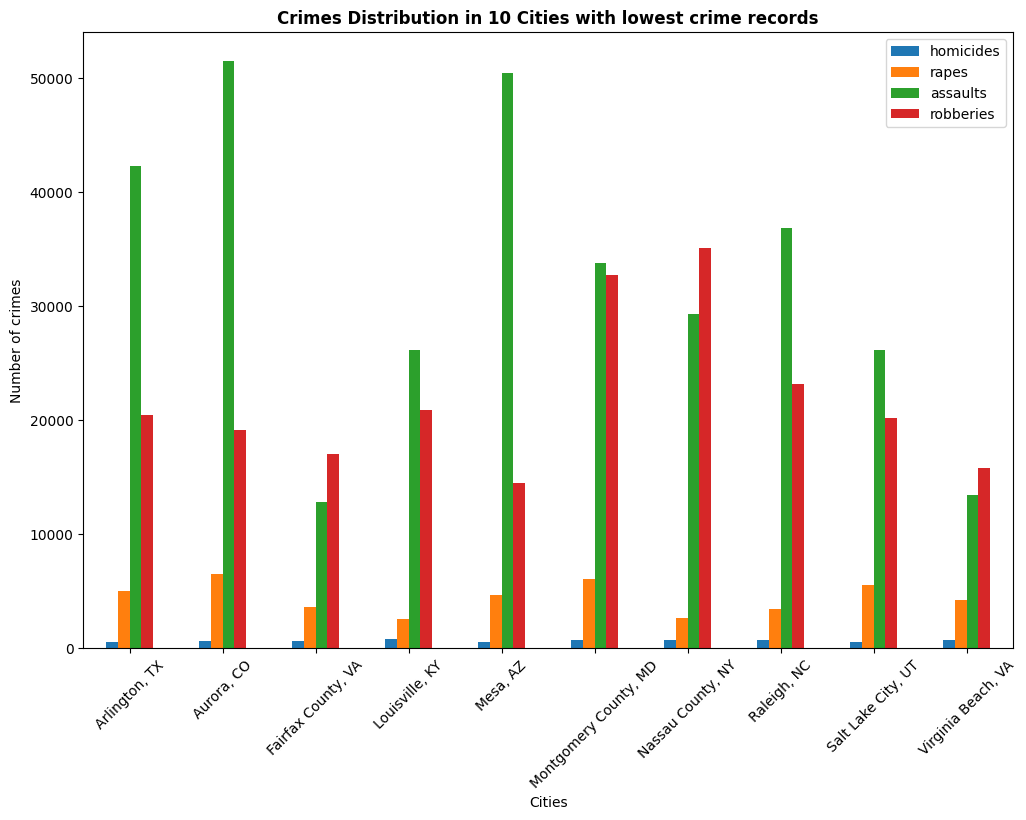

In [ ]:
least_crime_cities=recorded_agency_jurisdiction_crimes.sort_values('violent_crimes').head(10)['agency_jurisdiction'].to_list()
least_crime_cities=df[df['agency_jurisdiction'].isin(least_crime_cities)]
least_crime_cities.groupby('agency_jurisdiction')['homicides',	'rapes', 	'assaults', 	'robberies'].sum().plot(kind='bar', figsize=(12,8) )
plt.title('Crimes Distribution in 10 Cities with lowest crime records', fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of crimes')
plt.xticks(rotation=45)

**Any Relationship between Population and Crime Occurence?**

<ipython-input-116-89cf7ed0b554>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_population_crime=df.groupby(['agency_jurisdiction'])['population', 'violent_crimes', 'homicides',	'rapes', 	'assaults', 	'robberies'].mean().reset_index()


Text(0.5, 1.0, 'Relationship between Population and Crime Occurence')

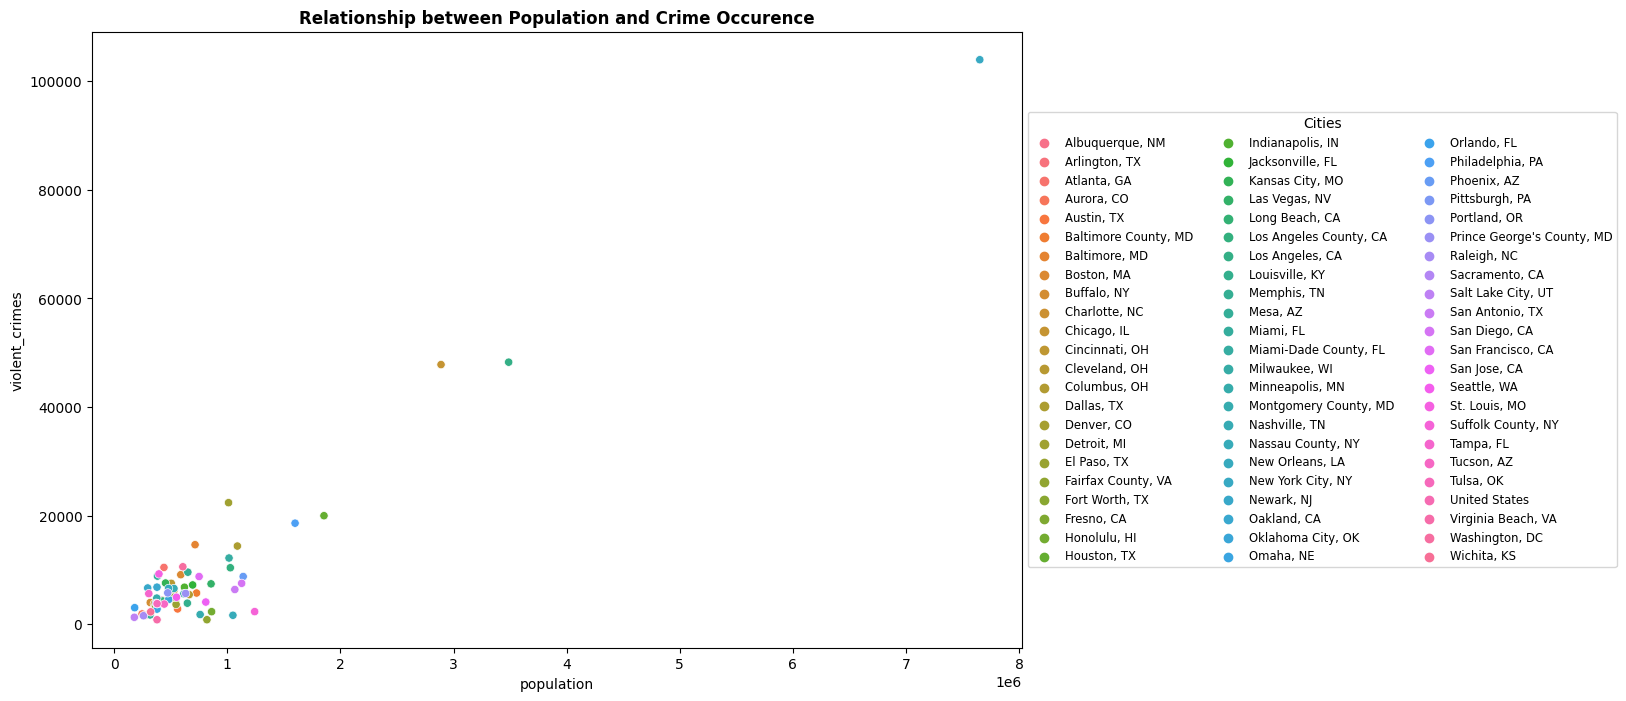

In [ ]:
plt.figure(figsize=(12,8))
avg_population_crime=df.groupby(['agency_jurisdiction'])['population', 'violent_crimes', 'homicides',	'rapes', 	'assaults', 	'robberies'].mean().reset_index()
sns.scatterplot(data=avg_population_crime,x='population', y='violent_crimes', hue='agency_jurisdiction')
plt.legend(loc='center left', ncol=3, bbox_to_anchor=(1, 0.5), title="Cities", fontsize='small', fancybox=True)
plt.title('Relationship between Population and Crime Occurence', fontweight='bold')

**Crime Distribution in Top 5 most Populous Cities**

Text(0.5, 1.0, 'Crime Distribution in Top 5 most Populous Cities')

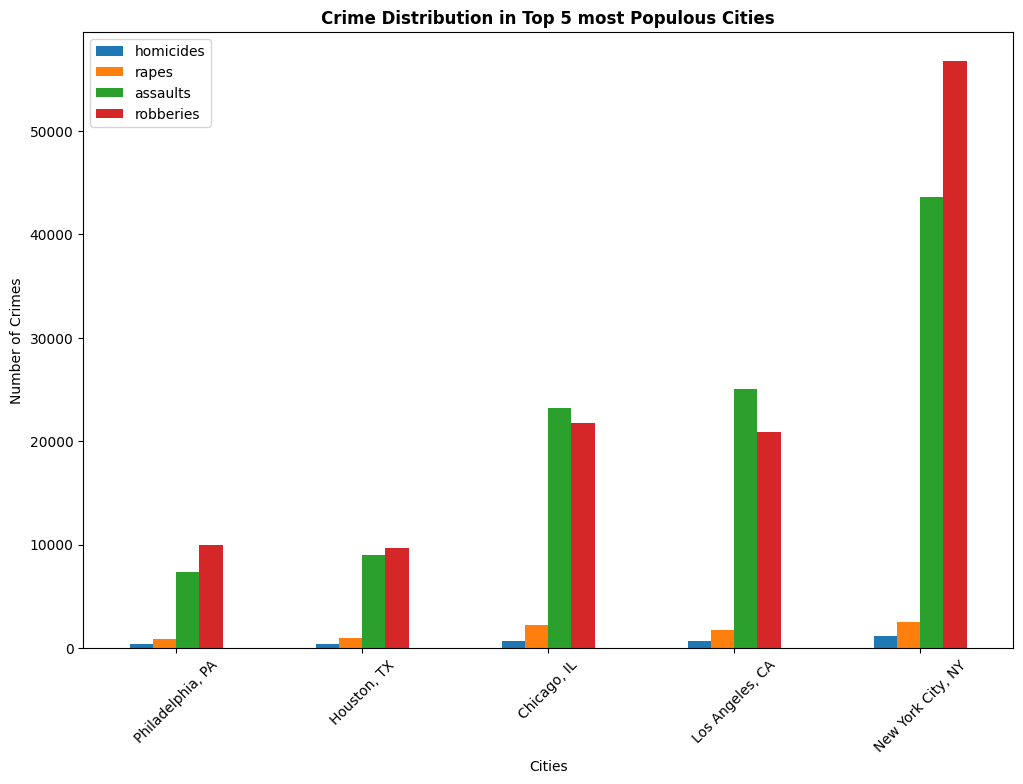

In [ ]:
avg_population_crime.sort_values('population').drop(65).tail(5).set_index('agency_jurisdiction').drop(['population','violent_crimes'] , axis=1).plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Number of Crimes')
plt.title('Crime Distribution in Top 5 most Populous Cities', fontweight='bold')

**The Distribution of Crime in the Five Least Populous Cities**

Text(0.5, 1.0, 'The Distribution of Crime in the Five Least Populous Cities')

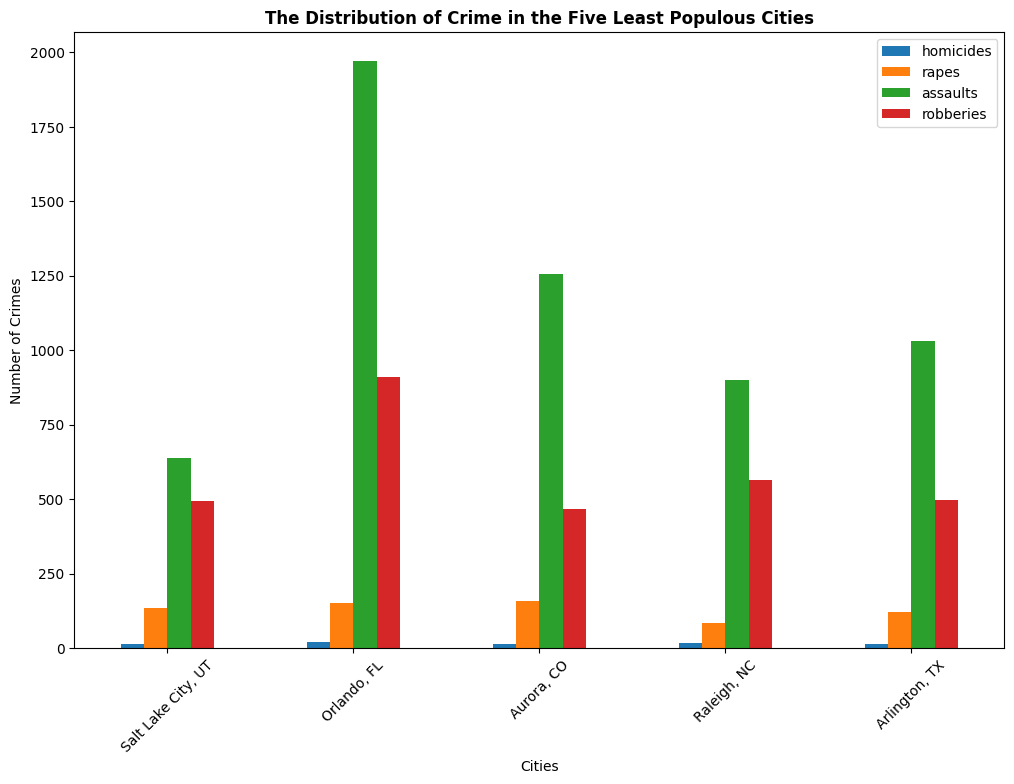

In [ ]:
avg_population_crime.sort_values('population').drop(65).head(5).set_index('agency_jurisdiction').drop(['population','violent_crimes'] , axis=1).plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Number of Crimes')
plt.title('The Distribution of Crime in the Five Least Populous Cities', fontweight='bold')

**Relationship between Population and Violent Crime Per 100,000 Population**

<ipython-input-119-6baa7aa72c7d>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_population_crime=df.groupby(['agency_jurisdiction'])['violent crime per 100000 population', 'population', 'violent_crimes'].mean().reset_index()


Text(0.5, 1.0, 'Relationship between Population and Violent Crime Per 100,000 Population')

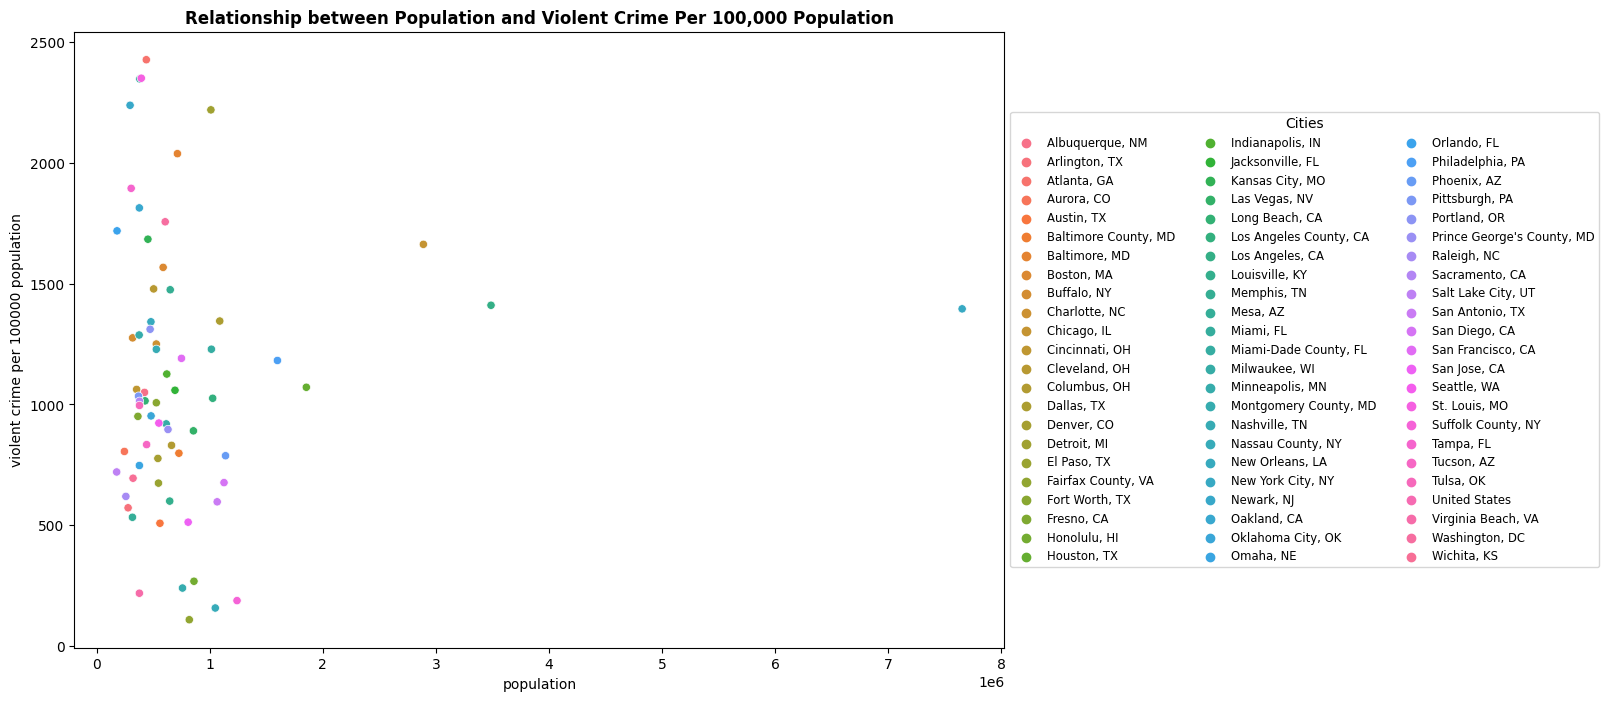

In [ ]:
plt.figure(figsize=(12,8))

df['violent crime per 100000 population']= (df['violent_crimes'] * 100000 ) / df['population']

avg_population_crime=df.groupby(['agency_jurisdiction'])['violent crime per 100000 population', 'population', 'violent_crimes'].mean().reset_index()
sns.scatterplot(data=avg_population_crime,x='population', y='violent crime per 100000 population', hue='agency_jurisdiction')
plt.legend(loc='center left', ncol=3, bbox_to_anchor=(1, 0.5), title="Cities", fontsize='small', fancybox=True)
plt.title('Relationship between Population and Violent Crime Per 100,000 Population', fontweight='bold')